# 단변량 분석
- 숫자형
- 범주형

## 1. 숫자형
- 숫자형 변수를 정리하는 방법
    - 기초통계량 : 숫자로 요약 => 정보의 대표값(mean, mode(최빈값), Quantile(사분위수), median(중앙값))
    - 도수분포표 : 구간을 나눈 후 빈도수 계산 ex) 10대 = n, 20대 = m ...
- 숫자형 변수 시각화 : Histogram, Density plot, Box plot

## 숫자형 데이터 시각화
- 기초 통계량을 바탕으로 시각화 : Box plot
- 도수 분포표를 바탕으로 시각화 : Histogram, Density plot(KDE)

### Histogram
- 문법 1 : plt.hist(df['변수'], bins = 구간 수, edgecolor = 'gray') edgecolor : bar의 윤곽선의 색을 지정해 주는 옵션(생략가능)
    - bins를 적절하게 조절하여 그래프를 그려야 한다. 그 이유는 구간의 개수에 따라서 파악할 수 있는 내용이 달라지기 때문에
- 문법 2 : sns.histplot(x = 변수, data = df, bins = 구간 수) sns.histplot에서는 edgecolor을 자동으로 구분해줌

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = sns.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


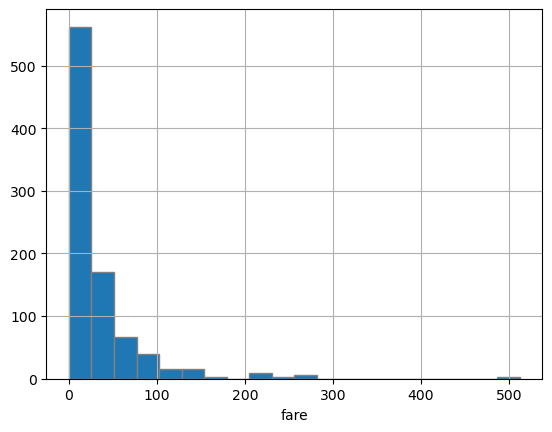

In [9]:
# plt.hist
plt.hist('fare', data = data, bins = 20, edgecolor = 'gray')
plt.xlabel('fare')
plt.grid()
plt.show()

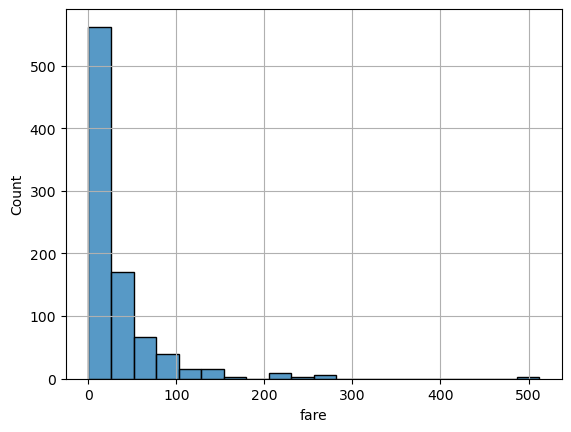

In [8]:
# sns.histplot
sns.histplot(x = 'fare', data = data, bins = 20)
plt.grid()
plt.show()

### 밀도 함수 그래프 : Density plot(KDE)
- 밀도 함수 그래프란
    - 막대의 너비를 가정하지 않고 모든 점에서 데이터의 밀도를 추정하는 커널 밀도 추정 방식을 사용한 그래프
- 밀도 함수 즉 히스토그램의 단점은 bins의 넓이를 어떻게 잡는지에 따라 전혀 다른 모양이 될 수 있다.
- 문법 : 
    - matplotlib로도 사용할 수 있지만 복잡하다. 따라서 seaborn을 사용함
    - sns.kdeplot(df['변수']) 또는 sns.kdeplot(x = '변수', data = df)
    - sns.histplot()에 kde = True 옵션을 주어 함께 사용할 수 있다.

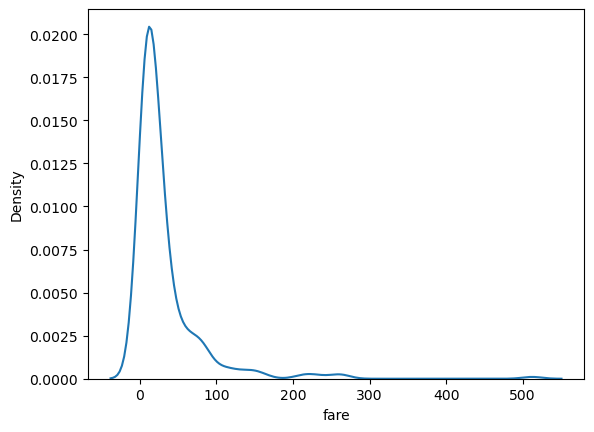

In [11]:
sns.kdeplot(x = 'fare', data = data)
plt.show()

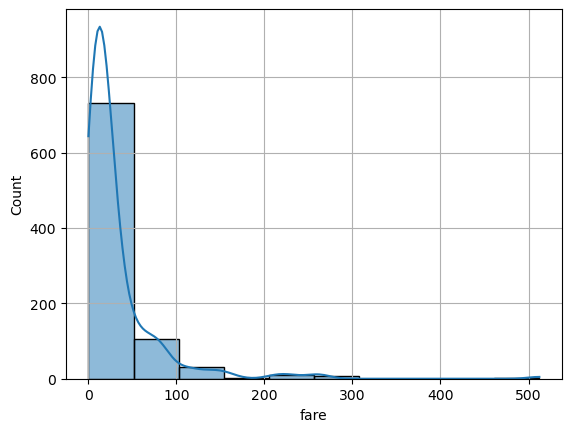

In [14]:
sns.histplot(x = 'fare', data = data, bins = 10, kde = True)
plt.grid()
plt.show()

### Boxplot

#### plt.boxplot()
- NaN값이 있으면 오류가 난다. 따라서 NaN을 제거 후 사용해야 한다.
- vert 옵션을 사용하여 횡, 종으로 그래프를 그릴 수 있다.
    - 횡(가로) 방향 : False
    - 종(세로) 방향 : True (기본값)
- 문법 :
    - plt.boxplot(df['변수'])
#### sns.boxplot()
- NaN값이 있어도 NaN값을 제거 후 그려준다.
- 문법 : 
    - sns.boxplot(x = df['변수'])

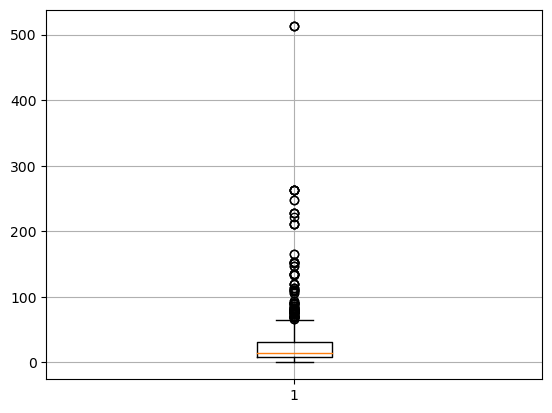

In [15]:
# plt.boxplot
plt.boxplot(data['fare'])
plt.grid()
plt.show()

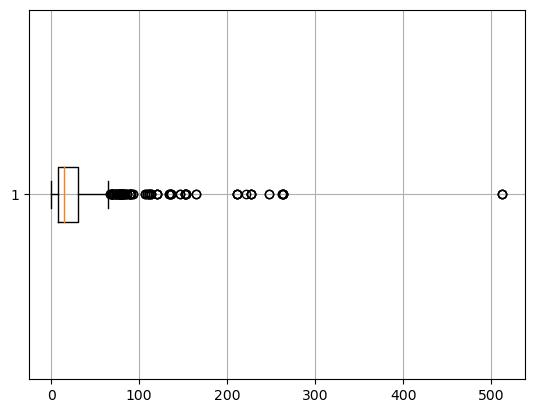

In [16]:
# plt.boxplot 가로 방향
plt.boxplot(data['fare'], vert = False)
plt.grid()
plt.show()

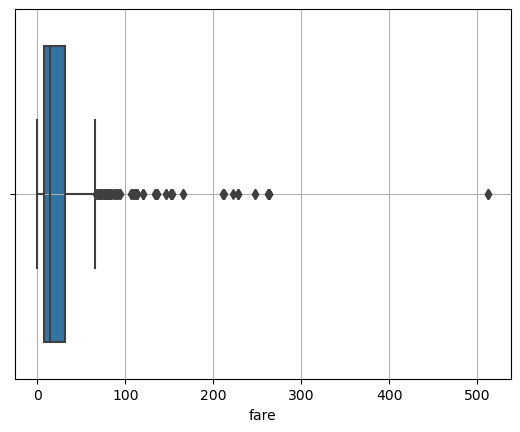

In [17]:
# sns.boxplot
sns.boxplot(x = data['fare'])
plt.grid()
plt.show()

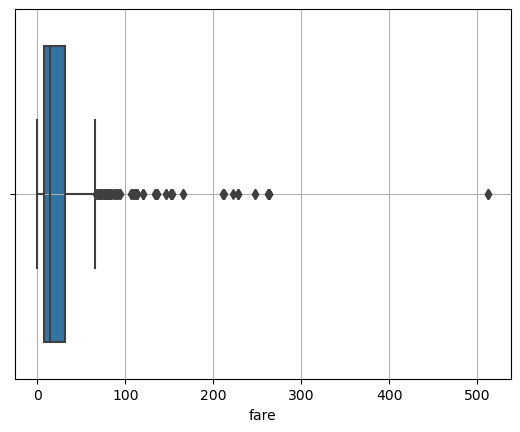

In [18]:
# sns.boxplot
sns.boxplot(x = 'fare', data = data)
plt.grid()
plt.show()

## 2. 범주형
- 범주형 변수 정리 : 
    - 범주별 빈도수 : df['변수'].value_counts()
    - 범주별 비율 : df['변수'].value_counts()/df.shape[0]
- 범주형 변수 시각화 : 
    - Bar Plot 
        - plt.bar : 범주별 빈도수를 직접 계산한 결과를 입력하여 범주별 빈도 barplot을 그림
            - 문법 : plt.bar(df['변수'].value_counts())
        - sns.countplot : 범주별 빈도수를 자동으로 계산하고 barplot을 그림
            - 문법 : sns.countplot(x = '변수', data = df) 또는 sns.countplot(df['변수'])

In [19]:
# survived 빈도수
data['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [20]:
# survived 비율
data['survived'].value_counts()/data.shape[0]

0    0.616162
1    0.383838
Name: survived, dtype: float64

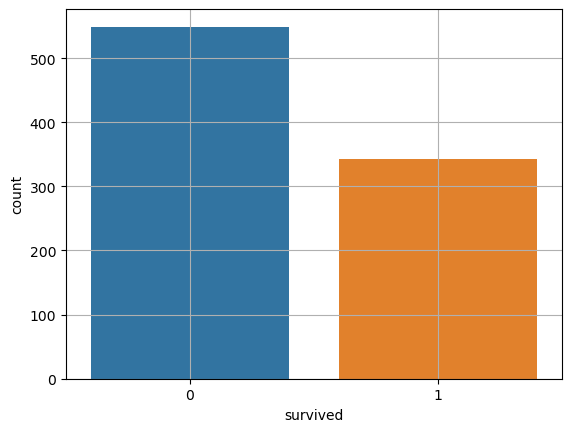

In [23]:
# sns.countplot
sns.countplot(x = 'survived', data = data)
plt.grid()
plt.show()